# Data for Social Good - Identifying Pittsburgh Neighborhoods' Risk for Gentrification

Group Members: Jessica Kneller, Maggie Kuehn, Lauren Lenherr <br> Mentored by Dominic Bordelon

Data sources:

* [2010 Census Blocks with Geographic Codes Southwestern PA](https://data.wprdc.org/dataset/2010-census-blocks-with-geographic-codes-southwestern-pa)--neighborhood names
* [Housing Market Value Analysis 2021](https://data.wprdc.org/dataset/market-value-analysis-2021), 2017-19
* [Housing Indicators](https://data.wprdc.org/dataset/housing-indicators), 2012-2021
* [PA Vacant Addresses](https://data.wprdc.org/dataset/vacant-addresses), 2012-2021
* [US Census Data](https://data.census.gov/), 2012-2021 (various data sets including education attainment, population, income race, neighborhood characteristics, household size information)

# Background

What is gentrification? What is Naturally Occurring Affordable Housing (NOAH)? <br> <br> Gentrification, according to Merriam Webster, is defined as a process in which a poor area (as of a city) experiences an influx of middle-class or wealthy people who renovate and rebuild homes and businesses and which often results in an increase in property values and the displacement of earlier, usually poorer resident. While gentrifying neighborhoods have benefits in terms of overall improvement in infrastructure, jobs, and increased housing values, it can have negative impacts on residents who can't afford to live there anymore and are essentially displaced out of their own home. This issue has become a major concern across urban areas across the United States and is widely talked about in politics when policy making. Naturally Occuring Affordable Housing are residental properties that are affordable without tax credits and subsidies.

# Literature Review

When selecting our method of measuring gentrification, we took into account previous published studies on measuring gentrification<br><br>
For example, the Freeman Method which defines an area as gentrified if it meets the following criteria:
* the tract was at or below the median income for its respective metropolitan area
* the percentage of housing stock within the tract built in the prior twenty years was at or below the median for all census tracts in the metropolitan area
* at least 50% of the census blocks within the tract were defined as urban

The Ellen & O’Regan model calls an area “gentrified” if 
* The ratio of the neighborhood’s household income at the start of the decade, compared to the metro average household income, is less than 0.7
* There is at least a 10 percentage-point increase in the ratio of neighborhood to metro average household income over the past decade

We ultimately choose to model our method based on findings from the paper "Identifying Gentrification using Machine
Learning" which was published on April 20, 2023 and is written by Jayne Yoo from the U.S. Census Bureau. This study used multiple machine learning methods such as Logistic Regression, K-nearest Neighbors Classifier, Random Forest, Support Vector Machines , and Gradient Boosting to measure and identify gentrification for the Washington DC metropolitan area. Random forest produced the most best reulst with an accuracy of 0.83, precision of 0.809, recall of 0.868 and F1 Score of 0.834. They then use the random forest estimates generated from the 2015 American Household Survey and apply to the characteristics present in the 2019 American Household Survery data to predict future gentrification in the Washington D.C. area. Due to these results, we also decided to utilize a random forest.

# Goal of our Project

Through this project, we aim to identify Pittsburgh neighborhoods that are at risk/may already be in the process of gentrification. Using housing market value anaylsis (MVA) scores given to block groups in Pittsburgh in the Western Pennsylvania Regional Data Center Housing Market Value Analysis dataset. The classifications are shown below. 

* “A” markets have the highest housing values, experience the largest level of new construction, have the highest owner occupancy levels, and experience little housing distress (such as residential vacancy and foreclosure). <br>
* “B” markets have elevated housing values, experience substantial amounts of new construction, have more renters than owners, and experience little housing distress.  <br> 
* “C” markets have above average housing values, experience about average levels of new construction, have the highest levels of owner occupancy, and experience little housing distress.  <br> 
* “D” markets have average housing values, experience half the countywide average amount of new construction, have more renters than owners, experience  average levels of foreclosure, and have low levels of vacant lots and poor or worse condition properties.<br> 
* “E” markets have slightly lower than average housing values, experience little new construction, have high levels of owner occupancy, have above average amounts of vacant land, and about average levels of foreclosure.<br> 
* “F” markets have slightly lower than average housing values, experience slightly above average amounts of new construction, have more owners than renters, and have high levels of renters with a subsidy. <br> 
* “G” markets have below average housing values, experience little new construction, have more owners than renters, and experience above average levels of foreclosure and residential vacant land. <br> 
* “H” markets have housing values well below the countywide average, experience little new construction, have about even numbers of renters and owners, have the highest share of residential vacant land, and the highest levels of foreclosure. <br> 
* “I” markets have the second lowest housing values, experience very little new construction, have the highest share of renters with a subsidy, experience the highest levels of building violations, and have elevated shares of poor or worse condition properties, vacant residential lot area, and foreclosure.<br> 
* “J” markets have the lowest housing values (although there is a substantial amount of variability in those prices), more renters than homeowners, the highest share of poor or worse condition properties, and elevated shares of building violations, vacant lots, and foreclosure.

Since MVA21 was generated from 2017-19 data, and several WPRDC datasets have availability beginning 2012, we have decided to treat the MVA21 category as an outcome variable of 2012-era predictors (housing and Census data), accounting for a “time lag” effect. Once we fit the random forest regressor model, and are satisfied with its accuracy, we will then input 2020 data to predict MVA categories for a future point in time. We can then see how Pittsburgh neighborhoods have changed in the last 10 plus years to see which are being affected or are at risk for gentrification.

## Data preprocessing

**Make sure to run the 0-census-processing notebook before beggining with this notebook


### Read Market Value Analysis 2021 data

In [81]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [82]:
mva = pd.read_csv("data/Pitts_Allegheny_MVA2021.csv")
geoid_mva = mva.iloc[:, [0, 10]]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print((geoid_mva.geoid.min(), geoid_mva.geoid.max()))

('420030103001', '420039822001')


The MVA geoid's are all 12 digits which is the [Census Block Group level](https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html). The **tract** is the first 11 digits.

In [83]:
geoid_mva["tract"] = geoid_mva["geoid"].apply(lambda x: x[0:11])
geoid_mva.head()

C:\Users\jessk\AppData\Local\Temp\ipykernel_26188\3125008876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geoid_mva["tract"] = geoid_mva["geoid"].apply(lambda x: x[0:11])


,geoid,MVA21,tract
0,420031014003,B,42003101400
1,420031014004,C,42003101400
2,420031016001,F,42003101600
3,420031017001,G,42003101700
4,420031017002,G,42003101700


Remove non-categorized geoids:

In [84]:
geoid_mva = geoid_mva.loc[geoid_mva.MVA21 != "NC"]

#### Join 2010 block-group level population

For weighting of tract-level classes by population size.

In [85]:
pop_2010 = pd.read_csv("data/census_raw/DECENNIALSF12010.P1-Data.csv")
pop_2010 = pop_2010.iloc[2:, [0, 2]]
pop_2010["P001001"] = pd.to_numeric(pop_2010["P001001"], errors="coerce")
pop_2010["geoid"] = pop_2010["GEO_ID"].str.replace('.*US', '', regex=True)
pop_2010 = pop_2010.iloc[:, [2, 1]].rename(columns={"P001001": "geoid_pop"})

In [86]:
pop_2010

,geoid,geoid_pop
2,420030103001,2594
3,420030103002,3336
4,420030103003,353
5,420030103004,317
6,420030201001,1435
...,...,...
1097,420039810001,4
1098,420039811001,7
1099,420039812001,0
1100,420039818001,461


In [87]:
#merges the 2010 geoid mva with pop_2010 table  
geoid_mva = geoid_mva.merge(pop_2010, on="geoid", how="left")

In [88]:
geoid_mva.head()

,geoid,MVA21,tract,geoid_pop
0,420031014003,B,42003101400,822.000
1,420031014004,C,42003101400,730.000
2,420031016001,F,42003101600,857.000
3,420031017001,G,42003101700,607.000
4,420031017002,G,42003101700,858.000


#### Since each neighborhood has different populations, the MVA scores need normalized for each neighborhood. Transform MVA to tract-level dummy variables

Each dummy variable will be a proportion 0-1 of tract MVA composition, based on `geoid_pop` and `tract_pop`.

In [89]:
tract_pop = geoid_mva.groupby(['tract'])['geoid_pop'].sum().reset_index(name="tract_pop")
geoid_mva = geoid_mva.merge(tract_pop, on="tract", how="left")

# columns A, B, C, ...
mva_wide = pd.pivot_table(geoid_mva, values="geoid_pop", index="geoid", columns="MVA21", aggfunc="first").reset_index()
geoid_mva = geoid_mva.merge(mva_wide, on="geoid", how="left")

# one row per tract, each MVA class summed:
tract_mva_sums = geoid_mva.groupby(['tract'])[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']].sum().reset_index()
tract_mva_sums = geoid_mva.iloc[:, [2, 4]].drop_duplicates().merge(tract_mva_sums, on="tract", how="left")

# proportional classes:
mva_classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
tract_mva_sums[mva_classes] = tract_mva_sums[mva_classes].div(tract_mva_sums['tract_pop'], axis=0)

tract_mva = tract_mva_sums.drop('tract_pop', axis=1)

In [90]:
tract_mva

,tract,A,B,C,D,E,F,G,H,I,J
0,42003101400,0.000,0.446,0.218,0.336,0.000,0.000,0.000,0.000,0.000,0.000
1,42003101600,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
2,42003101700,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
3,42003101800,0.000,0.000,0.399,0.000,0.601,0.000,0.000,0.000,0.000,0.000
4,42003110200,0.185,0.815,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
380,42003090100,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
381,42003090200,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
382,42003090300,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
383,42003100500,0.000,0.000,0.000,0.000,0.604,0.396,0.000,0.000,0.000,0.000


### Read parcel centroids and join neighborhood names

File is too large to upload, make sure to download parcel centroids 2022 August file from the WPRDC before continuing <br>https://data.wprdc.org/dataset/parcel-centroids-in-allegheny-county-with-geographic-identifiers

In [91]:
parcel_centroids = pd.read_csv("data/parcelcentroid2022_08wgs.csv")
parcels = parcel_centroids.loc[:, ["GEOID10", "geo_name_n", "geo_name_1"]]
parcels["tract"] = parcels["GEOID10"].apply(lambda x: str(x)[0:11] if len(str(x)) > 0 else "")
parcels = parcels.iloc[:,1:4]
parcels = parcels.drop_duplicates(["tract"])
parcels = parcels.rename(columns={
    "geo_name_n": "neighborhood",
    "geo_name_1": "municipality"
})
parcels.head()

C:\Users\jessk\AppData\Local\Temp\ipykernel_26188\382151540.py:1: DtypeWarning: Columns (18,19,20,21,22,31,32,35,40,41,44,47,49,50,53) have mixed types. Specify dtype option on import or set low_memory=False.
  parcel_centroids = pd.read_csv("data/parcelcentroid2022_08wgs.csv")


,neighborhood,municipality,tract
0,,Cheswick borough,42003418000
1,,Baldwin borough,42003480101
2,,Duquesne city,42003486700
3,,Elizabeth township,42003496101
4,,Coraopolis borough,42003450700


In [92]:
#joins the names of neighborhoods with the geoid MVA table
tract_mva = tract_mva.merge(parcels, on="tract", how="left")
tract_mva.head()

,tract,A,B,C,D,E,F,G,H,I,J,neighborhood,municipality
0,42003101400,0.000,0.446,0.218,0.336,0.000,0.000,0.000,0.000,0.000,0.000,Morningside,Pittsburgh city
1,42003101600,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,Garfield,Pittsburgh city
2,42003101700,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,Garfield,Pittsburgh city
3,42003101800,0.000,0.000,0.399,0.000,0.601,0.000,0.000,0.000,0.000,0.000,Stanton Heights,Pittsburgh city
4,42003110200,0.185,0.815,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Highland Park,Pittsburgh city


### Census data
All of this data was nornalized to be a proportion of the population in each neighborhood in order to accurately compare them

#### Educational attainment 
* Percentages of the population in each tract that have a high school degree or higher as well as percentage that has a bachelor degree or higher
#### Age
* Age by tract in groups that span five years starting at under 5 years old to 85 years plus
#### Race
* Percentage of the popluation in each tract for four races - white, black, asian, and latino
#### Employment
* Percentage unemployed
#### Household Information
* Perecntage of the population in each tract that moved within the last decade, mean houshold income, and average household size

In [93]:
census2012 = pd.read_csv("data/census_clean/census_2012.csv")
census2012["tract"]=census2012["tract"].astype(str)
census2012.head()

,tract,pop_total,pop_age_under5,pop_age_5to9,pop_age_10to14,pop_age_15to19,pop_age_20to24,pop_age_25to29,pop_age_30to34,pop_age_35to39,...,edu_hsplus,edu_bachelorsplus,movedin_last_decade,unemployed,income_household_mean,race_white_mono,race_black_mono,race_asian_mono,ethnicity_latino,households_avg_size
0,42003020100,4385,0.200,0.000,0.500,15.100,18.900,13.600,9.100,7.000,...,93.900,37.700,58.200,8.000,91071,59.100,27.100,7.400,5.500,1.330
1,42003020300,604,0.700,4.000,0.000,0.000,7.000,23.500,24.000,4.600,...,93.400,75.300,78.200,1.900,152763,71.200,3.500,10.800,15.400,1.590
2,42003030500,2304,6.700,4.900,8.100,5.900,16.100,5.600,3.300,4.200,...,76.100,13.200,59.700,26.000,19575,15.800,81.900,0.000,2.000,1.750
3,42003040200,2183,7.900,0.700,2.300,26.400,21.600,10.700,4.800,5.200,...,89.500,38.300,51.200,18.400,29110,44.000,48.100,4.800,2.800,2.180
4,42003040400,2298,0.400,0.000,0.000,18.800,35.200,4.400,3.800,0.000,...,98.900,63.300,51.100,1.200,52483,54.300,2.700,40.600,2.200,1.740


### Joining MVA + census

In [94]:
tract_mva_2012 = tract_mva.merge(census2012, on="tract", how="left")
tract_mva_2012.head()

,tract,A,B,C,D,E,F,G,H,I,...,edu_hsplus,edu_bachelorsplus,movedin_last_decade,unemployed,income_household_mean,race_white_mono,race_black_mono,race_asian_mono,ethnicity_latino,households_avg_size
0,42003101400,0.000,0.446,0.218,0.336,0.000,0.000,0.000,0.000,0.000,...,85.200,32.700,54.200,5.200,55225,79.400,18.400,0.900,1.700,2.220
1,42003101600,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,81.200,16.700,51.800,29.700,31587,4.400,94.500,0.000,0.000,2.660
2,42003101700,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,84.000,9.700,52.000,3.900,41464,13.000,77.100,3.800,0.500,2.380
3,42003101800,0.000,0.000,0.399,0.000,0.601,0.000,0.000,0.000,0.000,...,86.500,33.300,31.000,6.700,65866,77.900,19.000,2.600,0.500,2.320
4,42003110200,0.185,0.815,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,97.200,56.700,58.800,4.900,65561,63.300,28.600,5.100,1.000,1.870


### Housing data

#### Parcels-to-sales ratio


We will keep only the calculated ratio (num. parcels / num. sales). Since this table has many years, we will extract both 2012 and 2020 from it.

In [95]:
parcels_to_sales = pd.read_csv("data/parcelstosales.csv")
parcels_to_sales = parcels_to_sales.rename(columns={"geo_id_tract": "tract",
                                                    "parcels-sales": "parcels_sales_ratio"})
parcels_to_sales["tract"] = pd.to_numeric(parcels_to_sales["tract"], errors="coerce").astype("str")
parcels_to_sales = parcels_to_sales.iloc[:, [0, 2, 4]] # tract, year, parcels_sales_ratio

parcels_to_sales2012 = parcels_to_sales.loc[parcels_to_sales.year == 2012].iloc[:,[0,2]]
parcels_to_sales2020 = parcels_to_sales.loc[parcels_to_sales.year == 2020].iloc[:,[0,2]]

parcels_to_sales2012.head()

,tract,parcels_sales_ratio
0,42003010300,23.400
1,42003020100,NaN
2,42003020300,53.000
3,42003030500,99.300
4,42003040200,32.500


#### Housing Sales Data 1-2 Units

In [96]:
#Pulls tract values and total housing units to create percentages
TotalUnits2012 = pd.read_csv("data/census_clean/housing_units_2012_B25001.csv")
TotalUnits2012["tract"]=TotalUnits2012["tract"].astype(str)
TotalUnits2012["housing_units_total"] = TotalUnits2012["housing_units_total"].str.replace(",", "")
TotalUnits2012["housing_units_total"]=TotalUnits2012["housing_units_total"].astype(float)
TotalUnits2012

,tract,housing_units_total
0,42003010300,397.000
1,42003020100,2076.000
2,42003020300,430.000
3,42003030500,1453.000
4,42003040200,781.000
...,...,...
397,42003981000,10.000
398,42003981100,0.000
399,42003981200,0.000
400,42003981800,13.000


In [97]:
#upload data on how many 1-2unit houses were sold in each tract for years 2012-2021
OneTwoUnitSales = pd.read_csv("data/HousingSales1-2Units.csv")
OneTwoUnitSales

,_id,geo_id_tract,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,42003010300,10,7,13,7,11,5,9,2,1,2
1,2,42003020100,0,0,0,0,0,1,1,0,0,0
2,3,42003020300,1,0,5,2,2,1,1,4,0,1
3,4,42003030500,4,7,2,5,6,16,12,5,3,7
4,5,42003040200,11,10,7,11,11,9,6,6,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...
389,390,42125746100,0,0,0,0,0,0,2,0,0,1
390,391,42125746302,0,2,1,0,1,0,2,1,2,0
391,392,42125771100,0,1,0,1,0,0,0,0,0,0
392,393,42125771200,0,0,0,0,0,1,0,0,0,0


In [98]:
#remove unneeded columns and rename columns for eventual merging
OneTwoUnitSales2012 = OneTwoUnitSales.iloc[:, [1,2]]
OneTwoUnitSales2012 = OneTwoUnitSales2012.rename(columns = {"geo_id_tract": "tract","2012": "Unit12Sales"})
OneTwoUnitSales2012["tract"]=OneTwoUnitSales2012["tract"].astype(str)
OneTwoUnitSales2012["Unit12Sales"]=OneTwoUnitSales2012["Unit12Sales"].astype(float)
OneTwoUnitSales2012

,tract,Unit12Sales
0,42003010300,10.000
1,42003020100,0.000
2,42003020300,1.000
3,42003030500,4.000
4,42003040200,11.000
...,...,...
389,42125746100,0.000
390,42125746302,0.000
391,42125771100,0.000
392,42125771200,0.000


In [99]:
#create percentage by diving how many 1-2 units sold/total units in each tract
OneTwoUnitSales2012= OneTwoUnitSales2012.merge(TotalUnits2012, on="tract", how="left")
OneTwoUnitSales2012["Units12Sales"] = OneTwoUnitSales2012["Unit12Sales"]/OneTwoUnitSales2012["housing_units_total"]
OneTwoUnitSales2012 = OneTwoUnitSales2012.iloc[:,[0,3]]
OneTwoUnitSales2012

,tract,Units12Sales
0,42003010300,0.025
1,42003020100,0.000
2,42003020300,0.002
3,42003030500,0.003
4,42003040200,0.014
...,...,...
389,42125746100,NaN
390,42125746302,NaN
391,42125771100,NaN
392,42125771200,NaN


#### Vacant Addresses
Use total average days vacant for each tract as an indicator

In [100]:
vacantaddresses = pd.read_csv("data/PAVacantAddresses.csv")
vacantaddresses

,_id,geoid,quarter,ams_bus,ams_oth,ams_res,avg_ns_bus,avg_ns_oth,avg_ns_res,avg_vac_b,...,total_avg_vac,total_no_stat,total_pqv_pqns_is,total_vac_count,new_addr_r,new_addr_b,new_addr_o,drop_add_r,drop_add_b,drop_add_o
0,1,42001030101,12-Mar,27,0,1050,1386.000,0.000,1233.520,0.000,...,287,92,1,3,NaN,NaN,NaN,NaN,NaN,NaN
1,2,42001030102,12-Mar,21,4,2238,532.500,0.000,1142.080,0.000,...,0,164,3,0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,42001030200,12-Mar,59,11,2011,1110.360,0.000,1103.430,0.000,...,203,188,3,1,NaN,NaN,NaN,NaN,NaN,NaN
3,4,42001030300,12-Mar,23,16,1398,930.500,0.000,1484.500,0.000,...,0,160,4,0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,42001030400,12-Mar,43,14,1977,1484.860,0.000,1358.290,0.000,...,715,207,2,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12859,12860,42133023822,12-Dec,352,33,2917,1012.150,539.000,1468.540,894.060,...,1365,158,3,88,NaN,NaN,NaN,NaN,NaN,NaN
12860,12861,42133023901,12-Dec,244,52,3698,754.460,0.000,647.400,0.000,...,308,890,4,27,NaN,NaN,NaN,NaN,NaN,NaN
12861,12862,42133023902,12-Dec,11,1,1135,2078.500,0.000,1560.390,0.000,...,609,60,4,3,NaN,NaN,NaN,NaN,NaN,NaN
12862,12863,42133024001,12-Dec,54,13,2226,1854.550,0.000,1640.100,0.000,...,433,305,1,4,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
vacantaddresses = vacantaddresses.rename(columns = {"geoid": "tract"})

In [102]:
PAVac_Add_Agg = vacantaddresses.groupby(['tract'])['total_avg_vac'].mean().reset_index(name="vac_days_avg")
#geoid_vacantaddresses.iloc[geoid_vacantaddresses[]]

In [103]:
PAVac_Add_Agg["tract"]=vacantaddresses["tract"].astype(str)
PAVac_Add_Agg

,tract,vac_days_avg
0,42001030101,455.000
1,42001030102,0.000
2,42001030200,261.000
3,42001030300,0.000
4,42001030400,380.250
...,...,...
3211,42133023822,1188.000
3212,42133023901,371.250
3213,42133023902,603.750
3214,42133024001,368.250


#### Housing Vouchers - the amount of housing choice vouchers given to each neighborhood

Gather 2012 total population for each tract to create the percentages

In [104]:
census2012pop = pd.read_csv("data/census_clean/census_2012.csv")

In [105]:
census2012pop = census2012pop.iloc[:,[0,1]]
census2012pop["tract"]=census2012pop["tract"].astype(str)
census2012pop

,tract,pop_total
0,42003020100,4385
1,42003020300,604
2,42003030500,2304
3,42003040200,2183
4,42003040400,2298
...,...,...
388,42003980400,22
389,42003980700,38
390,42003981000,20
391,42003981800,510


In [106]:
housingchoicevoucher = pd.read_csv("data/Housing Choice Voucher.csv")
housingchoicevoucher

,_id,TRACT,2012
0,1,42003010300,19
1,2,42003020100,56
2,3,42003020300,7
3,4,42003030500,228
4,5,42003040200,53
...,...,...,...
397,398,42003981000,3
398,399,42003981100,0
399,400,42003981200,0
400,401,42003981800,0


In [107]:
housingchoicevoucher = housingchoicevoucher.iloc[:, [1,2]]

In [108]:
housingchoicevoucher = housingchoicevoucher.rename(columns = {"TRACT": "tract", "2012": "Total Housing Voucher"})
housingchoicevoucher["tract"]=housingchoicevoucher["tract"].astype(str)
housingchoicevoucher

,tract,Total Housing Voucher
0,42003010300,19
1,42003020100,56
2,42003020300,7
3,42003030500,228
4,42003040200,53
...,...,...
397,42003981000,3
398,42003981100,0
399,42003981200,0
400,42003981800,0


In [109]:
#change the housing choice vouchers into percentages
housingchoicevoucher= housingchoicevoucher.merge(census2012pop, on="tract", how="left")
housingchoicevoucher["HousingVoucherPercentage"] = housingchoicevoucher["Total Housing Voucher"]/housingchoicevoucher["pop_total"]
housingchoicevoucher = housingchoicevoucher.iloc[:,[0,3]]
housingchoicevoucher

,tract,HousingVoucherPercentage
0,42003010300,NaN
1,42003020100,0.013
2,42003020300,0.012
3,42003030500,0.099
4,42003040200,0.024
...,...,...
397,42003981000,0.150
398,42003981100,NaN
399,42003981200,NaN
400,42003981800,0.000


### Joining MVA + census + housing for 2012

In [110]:
tract_mva_2012 = tract_mva_2012.merge(parcels_to_sales2012, on="tract", how="left").merge(OneTwoUnitSales2012, on="tract", how="left").merge(PAVac_Add_Agg, on="tract", how="left").merge(housingchoicevoucher, on="tract", how="left")

In [111]:
tract_mva_2012.head()

,tract,A,B,C,D,E,F,G,H,I,...,income_household_mean,race_white_mono,race_black_mono,race_asian_mono,ethnicity_latino,households_avg_size,parcels_sales_ratio,Units12Sales,vac_days_avg,HousingVoucherPercentage
0,42003101400,0.000,0.446,0.218,0.336,0.000,0.000,0.000,0.000,0.000,...,55225,79.400,18.400,0.900,1.700,2.220,27.800,0.026,2077.750,0.010
1,42003101600,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,31587,4.400,94.500,0.000,0.000,2.660,45.500,0.010,1343.750,0.059
2,42003101700,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,41464,13.000,77.100,3.800,0.500,2.380,45.600,0.017,3971.000,0.066
3,42003101800,0.000,0.000,0.399,0.000,0.601,0.000,0.000,0.000,0.000,...,65866,77.900,19.000,2.600,0.500,2.320,33.700,0.028,727.250,0.003
4,42003110200,0.185,0.815,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,65561,63.300,28.600,5.100,1.000,1.870,23.200,0.018,2104.500,0.023


### Drop `NaN`

**NOTE:** We will need to re-evaluate missingness prior to fitting our model, to ensure we aren't dropping too much. Some values may need to be imputed.

In [112]:
tract_mva_2012 = tract_mva_2012.dropna()

In [113]:
tract_mva_2012

,tract,A,B,C,D,E,F,G,H,I,...,income_household_mean,race_white_mono,race_black_mono,race_asian_mono,ethnicity_latino,households_avg_size,parcels_sales_ratio,Units12Sales,vac_days_avg,HousingVoucherPercentage
0,42003101400,0.000,0.446,0.218,0.336,0.000,0.000,0.000,0.000,0.000,...,55225,79.400,18.400,0.900,1.700,2.220,27.800,0.026,2077.750,0.010
1,42003101600,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,31587,4.400,94.500,0.000,0.000,2.660,45.500,0.010,1343.750,0.059
2,42003101700,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,41464,13.000,77.100,3.800,0.500,2.380,45.600,0.017,3971.000,0.066
3,42003101800,0.000,0.000,0.399,0.000,0.601,0.000,0.000,0.000,0.000,...,65866,77.900,19.000,2.600,0.500,2.320,33.700,0.028,727.250,0.003
4,42003110200,0.185,0.815,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,65561,63.300,28.600,5.100,1.000,1.870,23.200,0.018,2104.500,0.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,42003090100,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,50693,70.800,22.500,2.200,7.800,2.020,15.500,0.048,2313.750,0.026
381,42003090200,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,51080,91.500,6.200,1.000,4.000,1.910,21.000,0.030,2593.750,0.008
382,42003090300,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,35294,84.900,11.400,1.200,1.900,1.940,21.600,0.026,2262.750,0.025
383,42003100500,0.000,0.000,0.000,0.000,0.604,0.396,0.000,0.000,0.000,...,47237,31.400,64.200,0.000,0.500,2.310,32.800,0.025,772.750,0.026


## Random forest model

Use the tract_mva_2012 data set to create a random forest model 

In [114]:
from sklearn.ensemble import RandomForestRegressor
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [115]:
#sort train and test data
predictors = tract_mva_2012.iloc[:, 14:]
target = tract_mva_2012.iloc[:,1:11]

x_train, x_test, y_train, y_test =  train_test_split(predictors,target,test_size = 0.2, random_state=50)

In [116]:
RD_forest_model = RandomForestRegressor()
RD_forest_model.fit(x_train, y_train)
predictions_RD_forest = RD_forest_model.predict(x_test)
predictions_RD_forest

array([[2.86497260e-03, 7.41850880e-03, 1.11794562e-02, 2.67548287e-01,
        9.08933652e-02, 3.90371306e-02, 3.48756126e-01, 1.82846243e-01,
        8.37730267e-03, 4.10786079e-02],
       [0.00000000e+00, 0.00000000e+00, 1.51746951e-03, 6.35115607e-02,
        4.42350325e-02, 3.45331894e-02, 3.17520832e-01, 5.01189029e-01,
        1.84529479e-02, 1.90399393e-02],
       [5.72994519e-03, 3.92960732e-02, 1.31489305e-02, 2.93817402e-01,
        8.05554773e-02, 8.12038916e-03, 3.83011902e-01, 1.27519027e-01,
        2.74539877e-03, 4.60554549e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.00000000e-02,
        3.06778134e-02, 3.90333673e-02, 1.50006146e-01, 6.74494917e-01,
        5.01072588e-02, 3.56804968e-02],
       [2.22802139e-01, 4.21434505e-02, 7.05320478e-01, 0.00000000e+00,
        2.78607593e-02, 1.87317358e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e-02, 0.00000000e+00, 3.56687560e-02,
   

In [117]:
# mean squared error
mse = mean_squared_error(y_test,predictions_RD_forest)
print('Mean Squared Error of the Random Forest Regressor: {0}'.format(mse))

Mean Squared Error of the Random Forest Regressor: 0.03838499043237253


In [118]:
rmse = np.sqrt(mse)
print('Root-Mean-Square Deviation of the Random Forest Regressor: {0}'.format(rmse))

Root-Mean-Square Deviation of the Random Forest Regressor: 0.19592087799000016


In [119]:
# Use the forest's predict method on the test data
predictions = RD_forest_model.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: A   0.060
B   0.110
C   0.110
D   0.120
E   0.150
F   0.040
G   0.170
H   0.130
I   0.050
J   0.070
dtype: float64 degrees.


C:\Users\jessk\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


[Text(0.5, 1.0, 'RF feature importance')]

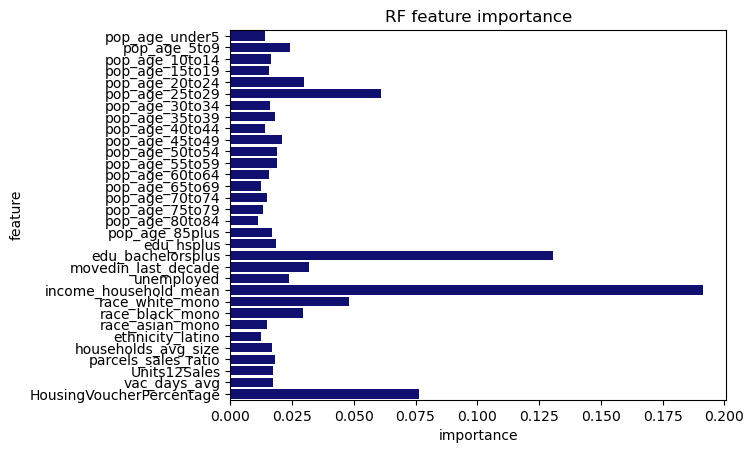

In [120]:
#bar pot to show most important features to the model
feature_importance = pd.DataFrame({'feature': tract_mva_2012.iloc[:, 14:].columns,
                                   'importance': RD_forest_model.feature_importances_})
#plt.barh(tract_mva_2012.iloc[:, 14:].columns, rf_regressor.feature_importances_, label="Feature importance")
sns.barplot(y='feature', x='importance', data=feature_importance, orient="h", color="navy").set(title = "RF feature importance")

## Predict future MVA proportions using 2020 data

## 2020 data cleanup

Cleaning up the data from 2020 in order to fit into the model.

### Census Data

Data from the US Census that includes population age brackets, education attainment level, number of those who have moved in to a new household within the last decade, percent unemployed, household income mean, race statistics, and household average size. All of this data is listed by census tract.

In [121]:
census2020 = pd.read_csv("data/census_clean/census_2020.csv")
census2020["tract"]=census2020["tract"].astype(str)
census2020.head()

,tract,pop_total,pop_age_under5,pop_age_5to9,pop_age_10to14,pop_age_15to19,pop_age_20to24,pop_age_25to29,pop_age_30to34,pop_age_35to39,...,edu_hsplus,edu_bachelorsplus,movedin_last_decade,unemployed,income_household_mean,race_white_mono,race_black_mono,race_asian_mono,ethnicity_latino,households_avg_size
0,42003020100,4385,0.200,0.000,0.500,15.100,18.900,13.600,9.100,7.000,...,93.900,37.700,58.200,8.000,91071,59.100,27.100,7.400,5.500,1.330
1,42003020300,604,0.700,4.000,0.000,0.000,7.000,23.500,24.000,4.600,...,93.400,75.300,78.200,1.900,152763,71.200,3.500,10.800,15.400,1.590
2,42003030500,2304,6.700,4.900,8.100,5.900,16.100,5.600,3.300,4.200,...,76.100,13.200,59.700,26.000,19575,15.800,81.900,0.000,2.000,1.750
3,42003040200,2183,7.900,0.700,2.300,26.400,21.600,10.700,4.800,5.200,...,89.500,38.300,51.200,18.400,29110,44.000,48.100,4.800,2.800,2.180
4,42003040400,2298,0.400,0.000,0.000,18.800,35.200,4.400,3.800,0.000,...,98.900,63.300,51.100,1.200,52483,54.300,2.700,40.600,2.200,1.740


### Housing Data

The following is 2020 data collected from the WPRDC by census tract in Allegheny County. It is the same data as above but for the year 2020. In the following notes, it is being cleaned so it can fit into the model.

#### Parcels-to-sales ratio

In [122]:
parcels_to_sales2020.head()

,tract,parcels_sales_ratio
3152,42003010300,234.000
3153,42003020100,NaN
3154,42003020300,NaN
3155,42003030500,132.300
3156,42003040200,32.500


#### Housing Sales Data 1-2 Units

In [123]:
OneTwoUnitSales2020 = OneTwoUnitSales.iloc[:, [1,10]]
OneTwoUnitSales2020 = OneTwoUnitSales2020.rename(columns = {"geo_id_tract": "tract", "2020": "1.2UnitSales"})
OneTwoUnitSales2020["tract"]=OneTwoUnitSales2020["tract"].astype(str)
OneTwoUnitSales2020

,tract,1.2UnitSales
0,42003010300,1
1,42003020100,0
2,42003020300,0
3,42003030500,3
4,42003040200,11
...,...,...
389,42125746100,0
390,42125746302,2
391,42125771100,0
392,42125771200,0


In [124]:
TotalUnits2020 = pd.read_csv("data/census_clean/housing_units_2020_B25001.csv")
TotalUnits2020["tract"]=TotalUnits2020["tract"].astype(str)
#TotalUnits2020["housing_units_total"] = TotalUnits2020["housing_units_total"].str.replace(",", "")
#TotalUnits2020["housing_units_total"]=TotalUnits2020["housing_units_total"].astype(float)
TotalUnits2020

,tract,housing_units_total
0,42003010301,0
1,42003010302,493
2,42003020100,2643
3,42003020300,1108
4,42003030500,1865
...,...,...
389,42003981000,0
390,42003981100,0
391,42003981200,0
392,42003981800,0


In [125]:
OneTwoUnitSales2020= OneTwoUnitSales2020.merge(TotalUnits2020, on="tract", how="left")
OneTwoUnitSales2020["Units12Sales"] = OneTwoUnitSales2020["1.2UnitSales"]/OneTwoUnitSales2020["housing_units_total"]
OneTwoUnitSales2020 = OneTwoUnitSales2020.iloc[:,[0,3]]
OneTwoUnitSales2020

,tract,Units12Sales
0,42003010300,NaN
1,42003020100,0.000
2,42003020300,0.000
3,42003030500,0.002
4,42003040200,0.017
...,...,...
389,42125746100,NaN
390,42125746302,NaN
391,42125771100,NaN
392,42125771200,NaN


In [126]:
OneTwoUnitSales2020 = OneTwoUnitSales2020.replace(np.inf, np.nan)

#### Vacant Addresses

In [127]:
vacantaddresses2020 = pd.read_csv("data/2020 PAVAC.csv")
vacantaddresses2020

,_id,geoid,quarter,ams_bus,ams_oth,ams_res,avg_ns_bus,avg_ns_oth,avg_ns_res,avg_vac_b,...,total_avg_vac,total_no_stat,total_pqv_pqns_is,total_vac_count,new_addr_r,new_addr_b,new_addr_o,drop_add_r,drop_add_b,drop_add_o
0,112631,42125722700,20-Dec,59,71,1559,3047.380,0,2192.270,0.000,...,0,220,2,0,NaN,NaN,NaN,NaN,NaN,NaN
1,112632,42007605001,20-Dec,20,22,1129,3601.710,0,2738.640,0.000,...,0,135,2,0,NaN,NaN,NaN,NaN,NaN,NaN
2,112633,42007603801,20-Dec,128,0,1452,3331.000,0,2882.300,4674.250,...,6685,69,0,76,NaN,NaN,NaN,NaN,NaN,NaN
3,112634,42129806100,20-Dec,70,17,1147,2525.250,0,2731.600,0.000,...,244,133,0,3,NaN,NaN,NaN,NaN,NaN,NaN
4,112635,42003455000,20-Dec,54,28,700,3562.600,0,3612.560,1986.880,...,3989,37,1,33,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,115844,42091205903,20-Dec,5,2,1047,0.000,0,2943.800,0.000,...,927,5,0,5,NaN,NaN,NaN,NaN,NaN,NaN
3214,115845,42129800200,20-Dec,38,44,704,1673.760,0,1688.730,1237.000,...,3336,84,3,131,NaN,NaN,NaN,NaN,NaN,NaN
3215,115846,42003563300,20-Dec,11,4,695,3065.670,0,2687.710,0.000,...,0,76,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3216,115847,42101008101,20-Dec,41,21,1169,4677.670,0,2852.000,4732.000,...,7484,11,0,56,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
vacantaddresses2020 = vacantaddresses2020.rename(columns = {"geoid": "tract"})

In [129]:
PAVac_Add_Agg2020 = vacantaddresses2020.groupby(['tract'])['total_avg_vac'].mean().reset_index(name="vac_days_avg")
#geoid_vacantaddresses.iloc[geoid_vacantaddresses[]]

In [130]:
PAVac_Add_Agg2020["tract"]=vacantaddresses2020["tract"].astype(str)
PAVac_Add_Agg2020

,tract,vac_days_avg
0,42125722700,0.000
1,42007605001,400.000
2,42007603801,0.000
3,42129806100,0.000
4,42003455000,279.000
...,...,...
3213,42091205903,3112.000
3214,42129800200,356.000
3215,42003563300,0.000
3216,42101008101,0.000


#### Housing Vouchers

In [131]:
census2020pop = pd.read_csv("data/census_clean/census_2020.csv")

In [132]:
census2020pop = census2020pop.iloc[:,[0,1]]
census2020pop["tract"]=census2020pop["tract"].astype(str)
census2020pop

,tract,pop_total
0,42003020100,4385
1,42003020300,604
2,42003030500,2304
3,42003040200,2183
4,42003040400,2298
...,...,...
388,42003980400,22
389,42003980700,38
390,42003981000,20
391,42003981800,510


In [133]:
housingchoicevoucher2020 = pd.read_csv("data/2020 voucher-by-tract.csv")
housingchoicevoucher2020

,TRACT,2020
0,42003010300,67
1,42003020100,122
2,42003020300,4
3,42003030500,396
4,42003040200,38
...,...,...
397,42003981000,0
398,42003981100,0
399,42003981200,0
400,42003981800,3


In [134]:
housingchoicevoucher2020 = housingchoicevoucher2020.rename(columns = {"TRACT": "tract", "2020": "Total Housing Vouchers"})
housingchoicevoucher2020["tract"]=housingchoicevoucher2020["tract"].astype(str)
housingchoicevoucher2020

,tract,Total Housing Vouchers
0,42003010300,67
1,42003020100,122
2,42003020300,4
3,42003030500,396
4,42003040200,38
...,...,...
397,42003981000,0
398,42003981100,0
399,42003981200,0
400,42003981800,3


In [135]:
housingchoicevoucher2020= housingchoicevoucher2020.merge(census2020pop, on="tract", how="left")
housingchoicevoucher2020["HousingVoucherPercentage"] = housingchoicevoucher2020["Total Housing Vouchers"]/housingchoicevoucher2020["pop_total"]
housingchoicevoucher2020 = housingchoicevoucher2020.iloc[:,[0,3]]
housingchoicevoucher2020

,tract,HousingVoucherPercentage
0,42003010300,NaN
1,42003020100,0.028
2,42003020300,0.007
3,42003030500,0.172
4,42003040200,0.017
...,...,...
397,42003981000,0.000
398,42003981100,NaN
399,42003981200,NaN
400,42003981800,0.006


### Joining census + housing for 2020 to put into random forest regressor

The following code is a join of the US Census Data and the WPRDC Housing Data. The join was a left join based around tract number. 

In [136]:
indicators2020wtract = census2020.merge(parcels_to_sales2020, on="tract", how="left").merge(OneTwoUnitSales2020, on="tract", how="left").merge(PAVac_Add_Agg2020, on="tract", how="left").merge(housingchoicevoucher2020, on="tract", how="left")
indicators2020wtract

,tract,pop_total,pop_age_under5,pop_age_5to9,pop_age_10to14,pop_age_15to19,pop_age_20to24,pop_age_25to29,pop_age_30to34,pop_age_35to39,...,income_household_mean,race_white_mono,race_black_mono,race_asian_mono,ethnicity_latino,households_avg_size,parcels_sales_ratio,Units12Sales,vac_days_avg,HousingVoucherPercentage
0,42003020100,4385,0.200,0.000,0.500,15.100,18.900,13.600,9.100,7.000,...,91071,59.100,27.100,7.400,5.500,1.330,NaN,0.000,4638.000,0.028
1,42003020300,604,0.700,4.000,0.000,0.000,7.000,23.500,24.000,4.600,...,152763,71.200,3.500,10.800,15.400,1.590,NaN,0.000,2122.000,0.007
2,42003030500,2304,6.700,4.900,8.100,5.900,16.100,5.600,3.300,4.200,...,19575,15.800,81.900,0.000,2.000,1.750,132.300,0.002,3985.000,0.172
3,42003040200,2183,7.900,0.700,2.300,26.400,21.600,10.700,4.800,5.200,...,29110,44.000,48.100,4.800,2.800,2.180,32.500,0.017,0.000,0.017
4,42003040400,2298,0.400,0.000,0.000,18.800,35.200,4.400,3.800,0.000,...,52483,54.300,2.700,40.600,2.200,1.740,NaN,0.000,2801.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,42003980400,22,0.000,0.000,0.000,0.000,36.400,0.000,0.000,0.000,...,N,54.500,45.500,0.000,27.300,1.380,NaN,NaN,0.000,0.000
389,42003980700,38,0.000,0.000,0.000,26.300,13.200,10.500,0.000,0.000,...,N,100.000,0.000,0.000,0.000,2.710,NaN,NaN,0.000,0.000
390,42003981000,20,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,N,100.000,0.000,0.000,0.000,2.000,NaN,NaN,0.000,0.000
391,42003981800,510,0.000,0.200,0.600,18.800,25.700,1.200,1.200,0.600,...,48508,49.200,45.500,0.000,3.100,1.920,17.000,NaN,0.000,0.006


### Drop `NaN`

**NOTE:** We will need to re-evaluate missingness prior to fitting our model, to ensure we aren't dropping too much. Some values may need to be imputed.

In [137]:
indicators2020wtract = indicators2020wtract.dropna()

In [138]:
indicators2020wtract

,tract,pop_total,pop_age_under5,pop_age_5to9,pop_age_10to14,pop_age_15to19,pop_age_20to24,pop_age_25to29,pop_age_30to34,pop_age_35to39,...,income_household_mean,race_white_mono,race_black_mono,race_asian_mono,ethnicity_latino,households_avg_size,parcels_sales_ratio,Units12Sales,vac_days_avg,HousingVoucherPercentage
2,42003030500,2304,6.700,4.900,8.100,5.900,16.100,5.600,3.300,4.200,...,19575,15.800,81.900,0.000,2.000,1.750,132.300,0.002,3985.000,0.172
3,42003040200,2183,7.900,0.700,2.300,26.400,21.600,10.700,4.800,5.200,...,29110,44.000,48.100,4.800,2.800,2.180,32.500,0.017,0.000,0.017
5,42003040500,2949,0.300,0.000,0.000,15.900,66.500,4.300,2.100,2.600,...,24915,79.500,5.800,8.700,2.800,2.430,106.700,0.002,2733.000,0.000
6,42003040600,2212,1.000,0.000,0.600,2.100,75.300,3.300,0.500,2.300,...,27712,85.000,5.400,4.200,3.700,2.490,122.000,0.002,2995.000,0.000
7,42003040900,2758,1.700,2.700,2.500,2.500,45.400,5.400,1.800,3.700,...,40294,73.100,21.300,4.600,3.000,2.430,47.500,0.009,1297.000,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,42003564000,5375,8.000,6.600,5.900,4.800,4.700,4.900,8.100,7.600,...,89182,95.000,0.800,2.000,0.600,2.570,34.800,0.021,1626.000,0.001
383,42003564100,985,4.600,6.700,7.600,5.400,4.900,2.700,4.400,3.900,...,155540,98.100,0.400,1.000,1.900,2.650,19.500,0.050,0.000,0.000
384,42003564200,2280,3.700,3.600,4.100,3.700,5.700,5.200,2.600,3.200,...,56929,95.300,1.400,1.500,0.000,2.140,37.100,0.021,5448.000,0.001
385,42003564400,5591,5.000,3.800,4.100,3.500,5.700,6.200,10.400,3.500,...,57345,94.200,4.800,0.000,0.300,2.120,32.000,0.025,5340.000,0.007


Remove tract

In [139]:
indicators2020 = indicators2020wtract.iloc[:,2:]
indicators2020

,pop_age_under5,pop_age_5to9,pop_age_10to14,pop_age_15to19,pop_age_20to24,pop_age_25to29,pop_age_30to34,pop_age_35to39,pop_age_40to44,pop_age_45to49,...,income_household_mean,race_white_mono,race_black_mono,race_asian_mono,ethnicity_latino,households_avg_size,parcels_sales_ratio,Units12Sales,vac_days_avg,HousingVoucherPercentage
2,6.700,4.900,8.100,5.900,16.100,5.600,3.300,4.200,4.400,4.900,...,19575,15.800,81.900,0.000,2.000,1.750,132.300,0.002,3985.000,0.172
3,7.900,0.700,2.300,26.400,21.600,10.700,4.800,5.200,1.500,3.700,...,29110,44.000,48.100,4.800,2.800,2.180,32.500,0.017,0.000,0.017
5,0.300,0.000,0.000,15.900,66.500,4.300,2.100,2.600,0.700,0.500,...,24915,79.500,5.800,8.700,2.800,2.430,106.700,0.002,2733.000,0.000
6,1.000,0.000,0.600,2.100,75.300,3.300,0.500,2.300,2.300,2.200,...,27712,85.000,5.400,4.200,3.700,2.490,122.000,0.002,2995.000,0.000
7,1.700,2.700,2.500,2.500,45.400,5.400,1.800,3.700,5.100,6.700,...,40294,73.100,21.300,4.600,3.000,2.430,47.500,0.009,1297.000,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,8.000,6.600,5.900,4.800,4.700,4.900,8.100,7.600,8.400,7.200,...,89182,95.000,0.800,2.000,0.600,2.570,34.800,0.021,1626.000,0.001
383,4.600,6.700,7.600,5.400,4.900,2.700,4.400,3.900,6.700,10.600,...,155540,98.100,0.400,1.000,1.900,2.650,19.500,0.050,0.000,0.000
384,3.700,3.600,4.100,3.700,5.700,5.200,2.600,3.200,7.100,8.200,...,56929,95.300,1.400,1.500,0.000,2.140,37.100,0.021,5448.000,0.001
385,5.000,3.800,4.100,3.500,5.700,6.200,10.400,3.500,6.200,7.100,...,57345,94.200,4.800,0.000,0.300,2.120,32.000,0.025,5340.000,0.007


### Run Random Forest on 2020 data

Now, running the Random Forest model on the 2020 data, we will be able to see the change in MVA values and test against the chosen indicators.

In [140]:
predictions2020 = RD_forest_model.predict(indicators2020)
predictions2020

array([[0.        , 0.00742706, 0.        , ..., 0.08745223, 0.13408276,
        0.20090768],
       [0.02149854, 0.12514522, 0.01559973, ..., 0.09978459, 0.03014775,
        0.03094211],
       [0.01278882, 0.61333552, 0.03346896, ..., 0.03984584, 0.        ,
        0.        ],
       ...,
       [0.        , 0.00221334, 0.06789639, ..., 0.00480312, 0.        ,
        0.00857205],
       [0.        , 0.        , 0.00481337, ..., 0.07212733, 0.01268846,
        0.00731478],
       [0.00753007, 0.        , 0.03969608, ..., 0.01871785, 0.        ,
        0.08733063]])

In [141]:
[print(*line) for line in predictions2020]

0.0 0.007427055702917772 0.0 0.006822759522507209 0.008594134542767518 0.5110185517330829 0.04369483382126555 0.08745222668397097 0.13408275668815237 0.2009076813053358
0.021498542084384415 0.1251452235725365 0.015599726086220954 0.5759342209779421 0.026877069340440953 0.014143828168218414 0.05992693743487917 0.09978459215444115 0.030147747997546322 0.030942112183389946
0.012788816896118578 0.6133355170742237 0.033468956689765045 0.19065236897193433 0.037950605030163 0.00886039886039886 0.06309749756496666 0.039845838912429696 0.0 0.0
0.0015950547223348196 0.16627132614344098 0.041508485694455734 0.35569600400237084 0.09460936297801714 0.012848288775999622 0.20159618391369669 0.10493485025922719 0.003296988577362409 0.017643454933094608
0.0028649725959143 0.04876163313539102 0.009072774874248913 0.6626088099020686 0.04571768855831453 0.012905057467487853 0.14956240706964294 0.06280911175407457 0.0 0.005697544642857143
0.0 0.017427055702917773 0.0 0.041072574747932196 0.0074698141423232

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [142]:
predictions2020df = pd.DataFrame({'A': predictions2020[:, 0], 'B': predictions2020[:, 1], 'C': predictions2020[:, 2], 'D': predictions2020[:, 3], 'E': predictions2020[:, 4], 'F': predictions2020[:, 5],'G': predictions2020[:, 6], 'H': predictions2020[:, 7],'I': predictions2020[:, 8], 'J': predictions2020[:, 9]})

### Changing the random forest results array into a data frame

Getting the results from the random forest, the results must be put into a data frame according to MVA value. This is so we can determine the ratio of MVA class each tract is categorized under.

In [143]:
predictions2020df

,A,B,C,D,E,F,G,H,I,J
0,0.000,0.007,0.000,0.007,0.009,0.511,0.044,0.087,0.134,0.201
1,0.021,0.125,0.016,0.576,0.027,0.014,0.060,0.100,0.030,0.031
2,0.013,0.613,0.033,0.191,0.038,0.009,0.063,0.040,0.000,0.000
3,0.002,0.166,0.042,0.356,0.095,0.013,0.202,0.105,0.003,0.018
4,0.003,0.049,0.009,0.663,0.046,0.013,0.150,0.063,0.000,0.006
...,...,...,...,...,...,...,...,...,...,...
341,0.270,0.052,0.412,0.014,0.197,0.009,0.046,0.000,0.000,0.000
342,0.679,0.022,0.300,0.000,0.000,0.000,0.000,0.000,0.000,0.000
343,0.000,0.002,0.068,0.013,0.744,0.013,0.147,0.005,0.000,0.009
344,0.000,0.000,0.005,0.030,0.205,0.092,0.576,0.072,0.013,0.007


Join with tract

In [144]:
# Extract tract column from indicator dataframe
extracted_col = indicators2020wtract["tract"]
 
# Display the column to be added
print("Column to be added:")
display(extracted_col)

Column to be added:


2      42003030500
3      42003040200
5      42003040500
6      42003040600
7      42003040900
          ...     
382    42003564000
383    42003564100
384    42003564200
385    42003564400
386    42003564500
Name: tract, Length: 346, dtype: object

In [145]:
#reset the index numbers from zero
extracted_col = extracted_col.reset_index()
extracted_col = extracted_col.iloc[:,[1]]
extracted_col

,tract
0,42003030500
1,42003040200
2,42003040500
3,42003040600
4,42003040900
...,...
341,42003564000
342,42003564100
343,42003564200
344,42003564400


In [146]:
# Add the extracted column
predictions2020df.insert(0, "tract", extracted_col)
predictions2020df

,tract,A,B,C,D,E,F,G,H,I,J
0,42003030500,0.000,0.007,0.000,0.007,0.009,0.511,0.044,0.087,0.134,0.201
1,42003040200,0.021,0.125,0.016,0.576,0.027,0.014,0.060,0.100,0.030,0.031
2,42003040500,0.013,0.613,0.033,0.191,0.038,0.009,0.063,0.040,0.000,0.000
3,42003040600,0.002,0.166,0.042,0.356,0.095,0.013,0.202,0.105,0.003,0.018
4,42003040900,0.003,0.049,0.009,0.663,0.046,0.013,0.150,0.063,0.000,0.006
...,...,...,...,...,...,...,...,...,...,...,...
341,42003564000,0.270,0.052,0.412,0.014,0.197,0.009,0.046,0.000,0.000,0.000
342,42003564100,0.679,0.022,0.300,0.000,0.000,0.000,0.000,0.000,0.000,0.000
343,42003564200,0.000,0.002,0.068,0.013,0.744,0.013,0.147,0.005,0.000,0.009
344,42003564400,0.000,0.000,0.005,0.030,0.205,0.092,0.576,0.072,0.013,0.007


In [147]:
#rename columns to avoid confusion between original MVA values and predicted MVA values
predictions2020df = predictions2020df.rename(columns={"A": "Apred", "B": "Bpred","C": "Cpred", "D": "Dpred","E": "Epred", "F": "Fpred", "G": "Gpred", "H": "Hpred","I": "Ipred", "J": "Jpred"})
predictions2020df

,tract,Apred,Bpred,Cpred,Dpred,Epred,Fpred,Gpred,Hpred,Ipred,Jpred
0,42003030500,0.000,0.007,0.000,0.007,0.009,0.511,0.044,0.087,0.134,0.201
1,42003040200,0.021,0.125,0.016,0.576,0.027,0.014,0.060,0.100,0.030,0.031
2,42003040500,0.013,0.613,0.033,0.191,0.038,0.009,0.063,0.040,0.000,0.000
3,42003040600,0.002,0.166,0.042,0.356,0.095,0.013,0.202,0.105,0.003,0.018
4,42003040900,0.003,0.049,0.009,0.663,0.046,0.013,0.150,0.063,0.000,0.006
...,...,...,...,...,...,...,...,...,...,...,...
341,42003564000,0.270,0.052,0.412,0.014,0.197,0.009,0.046,0.000,0.000,0.000
342,42003564100,0.679,0.022,0.300,0.000,0.000,0.000,0.000,0.000,0.000,0.000
343,42003564200,0.000,0.002,0.068,0.013,0.744,0.013,0.147,0.005,0.000,0.009
344,42003564400,0.000,0.000,0.005,0.030,0.205,0.092,0.576,0.072,0.013,0.007


### Join MVA scores with Predicted MVA scores

Inner joining the MVA scores from the 2012 data with the predicted MVA scores from the 2020 data.

In [148]:
mvachange = pd.concat([tract_mva.set_index('tract'),predictions2020df.set_index('tract')], axis=1, join='inner')
mvachange

,A,B,C,D,E,F,G,H,I,J,...,Apred,Bpred,Cpred,Dpred,Epred,Fpred,Gpred,Hpred,Ipred,Jpred
tract,,,,,,,,,,,,,,,,,,,,,
42003101400,0.000,0.446,0.218,0.336,0.000,0.000,0.000,0.000,0.000,0.000,...,0.009,0.333,0.162,0.270,0.092,0.000,0.111,0.022,0.000,0.000
42003101800,0.000,0.000,0.399,0.000,0.601,0.000,0.000,0.000,0.000,0.000,...,0.034,0.064,0.211,0.148,0.448,0.007,0.087,0.000,0.000,0.002
42003110200,0.185,0.815,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.085,0.630,0.025,0.116,0.063,0.004,0.059,0.017,0.000,0.000
42003110600,0.298,0.300,0.403,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.294,0.312,0.301,0.043,0.035,0.000,0.016,0.000,0.000,0.000
42003111300,0.000,0.743,0.000,0.257,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.511,0.000,0.169,0.012,0.004,0.063,0.091,0.078,0.072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42003090100,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.373,0.066,0.246,0.162,0.009,0.089,0.051,0.003,0.002
42003090200,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.010,0.508,0.030,0.200,0.181,0.007,0.056,0.009,0.000,0.000
42003090300,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.067,0.004,0.529,0.030,0.009,0.187,0.143,0.010,0.021


### Calculate change in mva values for each tract

Creating a variable for each MVA value, "X_delta", that will be the difference in MVA value from the 2020 predicted value and the 2012 value.

In [149]:
mvachange['A_delta'] = mvachange['Apred'] - mvachange['A']
mvachange['B_delta'] = mvachange['Bpred'] - mvachange['B']
mvachange['C_delta'] = mvachange['Cpred'] - mvachange['C']
mvachange['D_delta'] = mvachange['Dpred'] - mvachange['D']
mvachange['E_delta'] = mvachange['Epred'] - mvachange['E']
mvachange['F_delta'] = mvachange['Fpred'] - mvachange['F']
mvachange['G_delta'] = mvachange['Gpred'] - mvachange['G']
mvachange['H_delta'] = mvachange['Hpred'] - mvachange['H']
mvachange['I_delta'] = mvachange['Ipred'] - mvachange['I']
mvachange['J_delta'] = mvachange['Jpred'] - mvachange['J']
mvachange

,A,B,C,D,E,F,G,H,I,J,...,A_delta,B_delta,C_delta,D_delta,E_delta,F_delta,G_delta,H_delta,I_delta,J_delta
tract,,,,,,,,,,,,,,,,,,,,,
42003101400,0.000,0.446,0.218,0.336,0.000,0.000,0.000,0.000,0.000,0.000,...,0.009,-0.113,-0.056,-0.066,0.092,0.000,0.111,0.022,0.000,0.000
42003101800,0.000,0.000,0.399,0.000,0.601,0.000,0.000,0.000,0.000,0.000,...,0.034,0.064,-0.188,0.148,-0.153,0.007,0.087,0.000,0.000,0.002
42003110200,0.185,0.815,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.100,-0.184,0.025,0.116,0.063,0.004,0.059,0.017,0.000,0.000
42003110600,0.298,0.300,0.403,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.004,0.012,-0.102,0.043,0.035,0.000,0.016,0.000,0.000,0.000
42003111300,0.000,0.743,0.000,0.257,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,-0.232,0.000,-0.088,0.012,0.004,0.063,0.091,0.078,0.072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42003090100,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,-0.627,0.066,0.246,0.162,0.009,0.089,0.051,0.003,0.002
42003090200,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.010,-0.492,0.030,0.200,0.181,0.007,0.056,0.009,0.000,0.000
42003090300,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.067,0.004,-0.471,0.030,0.009,0.187,0.143,0.010,0.021


In [150]:
deltamva = mvachange.iloc[:,[10,11,22,23,24,25,26,27,28,29,30,31]]

In [151]:
deltamva

,neighborhood,municipality,A_delta,B_delta,C_delta,D_delta,E_delta,F_delta,G_delta,H_delta,I_delta,J_delta
tract,,,,,,,,,,,,
42003101400,Morningside,Pittsburgh city,0.009,-0.113,-0.056,-0.066,0.092,0.000,0.111,0.022,0.000,0.000
42003101800,Stanton Heights,Pittsburgh city,0.034,0.064,-0.188,0.148,-0.153,0.007,0.087,0.000,0.000,0.002
42003110200,Highland Park,Pittsburgh city,-0.100,-0.184,0.025,0.116,0.063,0.004,0.059,0.017,0.000,0.000
42003110600,Highland Park,Pittsburgh city,-0.004,0.012,-0.102,0.043,0.035,0.000,0.016,0.000,0.000,0.000
42003111300,East Liberty,Pittsburgh city,0.000,-0.232,0.000,-0.088,0.012,0.004,0.063,0.091,0.078,0.072
...,...,...,...,...,...,...,...,...,...,...,...,...
42003090100,Central Lawrenceville,Pittsburgh city,0.000,-0.627,0.066,0.246,0.162,0.009,0.089,0.051,0.003,0.002
42003090200,Central Lawrenceville,Pittsburgh city,0.010,-0.492,0.030,0.200,0.181,0.007,0.056,0.009,0.000,0.000
42003090300,Bloomfield,Pittsburgh city,0.000,0.067,0.004,-0.471,0.030,0.009,0.187,0.143,0.010,0.021


### Define category of interest

In order to idenify neighborhoods at risk of gentrification based on predicted changes in the market value analysis scores, we want to sort the changes in mva values from highest to lowest. A high positive change in mva value signals a drastic change in the neighborhoods towards the upper end of the scale (closer to an A neighborhood which has higher incomes and experience little housing distress etc). This is what we want to focus on - previously low income neighborhoods at the lower end of the value score scale that are predicted to move into those higher levels, signaling potential risk of gentrification.

We are identifying neighborhoods that were previously in categories G, H, and I, since these are categorized by lower income, housing values, and experience little to no construction. Then, we can identify which neighborhoods in these categories have the highest predicted mva positive change. This will show us neighborhoods at risk to be gentrified in the next ten years.

To find the changes in value by each neighborhood, we first selected the rows we wanted and sorted them in descending order. We then filtered out tracts that are not identified as Pittsburgh neighborhoods.

Change in E neighborhood

In [152]:
Edelta = deltamva.iloc[:,[0,1,6]]
Edelta = Edelta.sort_values(['E_delta'], ascending=[False])
Edelta

,neighborhood,municipality,E_delta
tract,,,
42003460001,,Kennedy township,0.658
42003497000,,Lincoln borough,0.546
42003498000,,Liberty borough,0.381
42003404000,,East Deer township,0.364
42003500300,,Port Vue borough,0.356
...,...,...,...
42003520001,,Wilkins township,-0.650
42003270800,Brighton Heights,Pittsburgh city,-0.677
42003471000,,Heidelberg borough,-0.787


In [153]:
Edeltapitt = Edelta[Edelta["municipality"] == "Pittsburgh city"]
Edeltapitt

,neighborhood,municipality,E_delta
tract,,,
42003320400,Overbrook,Pittsburgh city,0.273
42003141100,Swisshelm Park,Pittsburgh city,0.247
42003320700,Overbrook,Pittsburgh city,0.201
42003090200,Central Lawrenceville,Pittsburgh city,0.181
42003090100,Central Lawrenceville,Pittsburgh city,0.162
...,...,...,...
42003100500,Stanton Heights,Pittsburgh city,-0.283
42003270100,Brighton Heights,Pittsburgh city,-0.348
42003060500,Polish Hill,Pittsburgh city,-0.371


Change in F neighborhoods

In [154]:
Fdelta = deltamva.iloc[:,[0,1,7]]
Fdelta = Fdelta.sort_values(['F_delta'], ascending=[False])
Fdelta

,neighborhood,municipality,F_delta
tract,,,
42003562400,Beltzhoover,Pittsburgh city,0.069
42003471000,,Heidelberg borough,0.068
42003560400,,Wilkinsburg borough,0.064
42003552100,,McKeesport city,0.063
42003561500,,Wilkinsburg borough,0.061
...,...,...,...
42003050100,Middle Hill,Pittsburgh city,-0.374
42003459101,,Robinson township,-0.387
42003030500,Crawford-Roberts,Pittsburgh city,-0.489


In [155]:
Fdeltapitt = Fdelta[Fdelta["municipality"] == "Pittsburgh city"]
Fdeltapitt 

,neighborhood,municipality,F_delta
tract,,,
42003562400,Beltzhoover,Pittsburgh city,0.069
42003130600,East Hills,Pittsburgh city,0.056
42003111500,East Liberty,Pittsburgh city,0.056
42003261400,Perry South,Pittsburgh city,0.048
42003563000,Windgap,Pittsburgh city,0.045
...,...,...,...
42003290400,Carrick,Pittsburgh city,-0.043
42003100500,Stanton Heights,Pittsburgh city,-0.187
42003111400,Garfield,Pittsburgh city,-0.268


Change in G neighborhoods

In [156]:
Gdelta = deltamva.iloc[:,[0,1,8]]
Gdelta = Gdelta.sort_values(['G_delta'], ascending=[False])
Gdelta

,neighborhood,municipality,G_delta
tract,,,
42003471000,,Heidelberg borough,0.549
42003494000,,Elizabeth borough,0.538
42003468700,,Carnegie borough,0.406
42003501000,,Versailles borough,0.406
42003457100,,Bridgeville borough,0.372
...,...,...,...
42003270300,Brighton Heights,Pittsburgh city,-0.654
42003497000,,Lincoln borough,-0.707
42003281400,Crafton Heights,Pittsburgh city,-0.803


In [157]:
Gdeltapitt = Gdelta[Gdelta["municipality"] == "Pittsburgh city"]
Gdeltapitt 

,neighborhood,municipality,G_delta
tract,,,
42003060500,Polish Hill,Pittsburgh city,0.262
42003191800,Brookline,Pittsburgh city,0.210
42003270800,Brighton Heights,Pittsburgh city,0.207
42003040600,Central Oakland,Pittsburgh city,0.202
42003090300,Bloomfield,Pittsburgh city,0.187
...,...,...,...
42003290100,Carrick,Pittsburgh city,-0.426
42003320400,Overbrook,Pittsburgh city,-0.481
42003192000,Beechview,Pittsburgh city,-0.601


## Results

In [158]:
#display top 5 neighborhoods for each category
E = Edeltapitt.reset_index()
F = Fdeltapitt.reset_index()
G = Gdeltapitt.reset_index()
topneighborhoods = pd.concat([E['neighborhood'], F['neighborhood'], G['neighborhood']], axis=1, keys=['Etop', 'Ftop','Gtop'])
topneighborhoods = topneighborhoods.iloc[[0,1,2,3,4],:]
topneighborhoods

,Etop,Ftop,Gtop
0,Overbrook,Beltzhoover,Polish Hill
1,Swisshelm Park,East Hills,Brookline
2,Overbrook,East Liberty,Brighton Heights
3,Central Lawrenceville,Perry South,Central Oakland
4,Central Lawrenceville,Windgap,Bloomfield


** Note: Overbook displays twice since certain neighborhoods hold multiple tracts

We see neighborhoods that we expect to see based off what areas we know to already be in the process of gentrification (Lawrenceville, East Liberty, Bloomfield).
Most of the neighborhoods we predicted as results are on the East End of Pittsburgh. However, a few are scattered on the West End.
While this is just a predictive model, it can help us be aware of which neighborhoods to be on the lookout for in the future. <br> There are some limitations to this method and resulting predictions, including potential for overfitting with the random forest and unforseen events, such as a pandemic, that can affect these predictions. Also, it is important to remember that gentrification is a complex social process and doesn't have one concrete definition. While this study uses certain predictors, other studies may use others that are also acceptable.

## Importance 

__Why is this a problem?__<br>
Most negative impacts of gentrification are experienced by the low-income individuals who are displaced from their original neighborhoods.
A higher rate of crime may exist in the area that a low-income individual is forced to relocate to.
Displaced individuals may experience longer commutes to work or school; and businesses may be displaced from the original community.


__How can we learn from this data?__ <br>
If we are able to predict future gentrifying neighborhoods at risk and identify neighborhoods that may already be going through this process, there are several ways to protect the people and businesses currently living in that community.
Some suggestions include:
1) Protecting naturally occurring affordable housing options
2) Support policies that protect affordable housing
3) Get community input on new development plans
4) Educate residents about new construction plans, proposed policies, and changes in their community


# Sources

- “Gentrification Definition &amp; Meaning.” Merriam-Webster, Merriam-Webster, www.merriam-webster.com/dictionary/gentrification. Accessed 4 Dec. 2023. 
- Yoo, Jayne. “Identifying Gentrification Using Machine Learning.” SEHSD Working Paper Number 2023-15, Apr. 2023.https://www.census.gov/content/dam/Census/library/working-papers/2023/demo/sehsd-wp2023-15.pdf. Accessed 4 Dec. 2023.
- Mujahid, Mahasin S., et al. “Gentrification and Displacement in the San Francisco Bay Area: A Comparison of Measurement Approaches.” International Journal of Environmental Research and Public Health, vol. 16, no. 12, June 2019, p. 2246, doi:10.3390/ijerph16122246.
- Cohen, Mychal, and Kathryn L. S. Pettit. “Guide to Measuring Neighborhood Change to Understand and Prevent Displacement.” National Neighborhood Indicators Partnership, Apr. 2019. https://www.urban.org/sites/default/files/publication/100135/guide_to_measuring_neighborhood_change_to_understand_and_prevent_displacement.pdf. Accessed 4 Dec. 2023.
- Housing Datasets of Allegheny County. Dataset - CKAN. data.wprdc.org/dataset. Accessed 4 Dec. 2023.
U.S. Census Data 2012 and 2020. U.S. Census Bureau. Explore Census Data. data.census.gov. Accessed 4 Dec. 2023.
- “What Is NOAH?” NOAH Impact Fund, 16 June 2017, noahimpactfund.com/impact-investing-affordable-housing-minnesota/what-is-noah. Accessed 4 Dec. 2023.
- Thackway, William, Matthew Ng, Chyi-Lin Lee, and Christopher Pettit. “Building a Predictive Machine Learning Model of Gentrification in Sydney.” Cities 134 (March 1, 2023): 104192. https://doi.org/10.1016/j.cities.2023.104192 <br>  Reades, Jonathan, Jordan De Souza, and Phil Hubbard. “Understanding Urban Gentrification through Machine Learning.” Urban Studies 56, no. 5 (April 1, 2019): 922–42. https://doi.org/10.1177/0042098018789054. <br> 
- Chapple, Karen, Ate Poorthuis, Matthew Zook, and Eva Phillips. “Monitoring Streets through Tweets: Using User-Generated Geographic Information to Predict Gentrification and Displacement.” Environment and Planning B: Urban Analytics and City Science 49, no. 2 (February 1, 2022): 704–21. https://doi.org/10.1177/23998083211025309. <br> 
- Easton et al. 2019, “Measuring and mapping displacement: The problem of quantification in the battle against gentrification”: https://doi.org/10.1177/0042098019851953 <br> 
- Wilhelmsson et al. 2021, “Gentrification effects on housing prices in neighbouring areas”: https://doi.org/10.1108/ijhma-04-2021-0049 <br> 
- Payne and Greiner 2019, “New‐Build Development and the Gentrification of Oklahoma City's Deep Deuce Neighborhood”: https://doi.org/10.1111/gere.12294 
